In [2]:
!pip install xgi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for xgi: filename=xgi-0.7.4-py3-none-any.whl size=140561 sha256=450479cc86e11b076aabf67aa98df384d1e4e41d230da0e2b461532a91e8841b
  Stored in directory: /root/.cache/pip/wheels/dc/80/37/558af7d8fecd5277fff7cfd93bfba587b0518fc3d7a5f0db4c
Successfully built xgi


In [3]:
import yaml
import sys
import xgi
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def read_dihypergraph(node):
	""""""
	res = xgi.DiHypergraph()
	match node:
		case yaml.ScalarNode(value=scalar):
			res.add_edge([[scalar], [scalar]])
		case yaml.MappingNode(value=mapping):
			all_keys = [read_dihypergraph(k) for k, v in mapping]
			for k in all_keys:
				res.add_edge([all_keys, k])
			for k, v in mapping:
				k, v = read_dihypergraph(k), read_dihypergraph(v)
				res.add_edge([k, v])
		case yaml.SequenceNode(value=sequence):
			for l, r in zip(sequence[:-1], sequence[1:]):
				l, r = read_dihypergraph(l), read_dihypergraph(r)
				res.add_edge([l, r])
	return res

<Axes: >

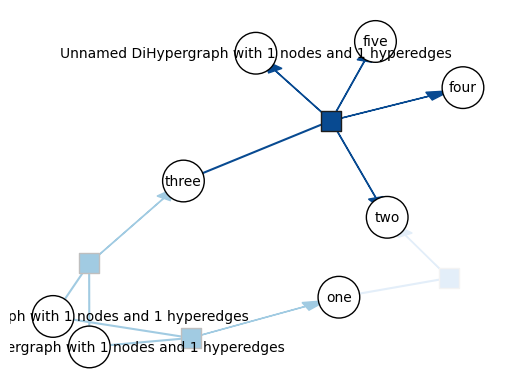

In [12]:
input_stream = """
one: two
three: [four, five: two ]
"""
res = xgi.DiHypergraph()
for doc in yaml.compose_all(input_stream, yaml.SafeLoader):
  res.add_edges_from(read_dihypergraph(doc).edges.dimembers())
  #res.add_edge([[res], read_dihypergraph(doc)])
xgi.draw_dihypergraph(res, node_labels=True)
#plt.show()